In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [3]:
def sinc_hamming(lblock,ntaps):
    M=lblock*ntaps
    x = (np.arange(0,M)-M/2)/lblock
    return np.sinc(x)*np.hamming(M)

In [162]:
def pfb(timestream,nchan,ntaps=4,window=sinc_hamming):

    lblock = 2*(nchan-1) #cuz rfftfreq is diff than fftfreq :/ :(
    nblocks = timestream.size//lblock
    print(timestream.size,nblocks)
    npfb = nblocks-ntaps+1
    print(npfb,"npfb")
    spec = np.zeros((npfb,lblock),dtype='complex128',order='c')
    print("lblock is", lblock)
    for b in range(npfb):
        dat = timestream[b*lblock:(b+ntaps)*lblock].copy()
        ft = np.fft.fft(dat)
        spec[b,:] = ft[::ntaps]
    return spec

(16,)


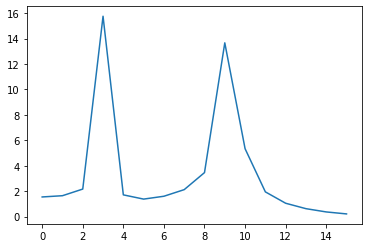

In [101]:
samprate=100 #Hz
ts_dur = 50 #s
t=np.linspace(0,ts_dur,samprate*ts_dur)
f1=10
f2=30
ts = np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)

ft=np.fft.rfft(ts[31:31*2])
plt.plot(np.abs(ft))
print(ft.shape)

In [163]:
spec=pfb(ts,16)

5000 166
163 npfb
lblock is 30


In [164]:
spec.shape

(163, 30)

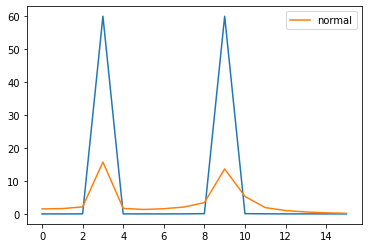

In [102]:
ps=np.abs(spec[0])
plt.plot(ps)
plt.plot(np.abs(ft),label='normal')
plt.legend()

In [144]:
xx=ts[:166*30:30]
yy=spec[:,0]
win=sinc_hamming(30,4)
ntaps=4
lblock=30
npfb=spec.shape[0]
nblock=ts.size//lblock

In [190]:
pseudo_ts=np.fft.ifft(spec,axis=1)
recons_ts = np.zeros(nblock*lblock)
for l in range(lblock):
    offsets=np.arange(ntaps)
    diagonals=[]
    for i in range(ntaps):
        dd=np.ones(npfb)*win[i*lblock+l]
        diagonals.append(dd)
    SW_small=sp.diags(diagonals,offsets=offsets,shape=(npfb,nblock)).toarray()
    Pinv=np.linalg.pinv(SW_small)
    recons_ts[l::lblock]=Pinv@pseudo_ts[:,l]

/tmp/ipykernel_34189/244533729.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  recons_ts[l::lblock]=Pinv@pseudo_ts[:,l]


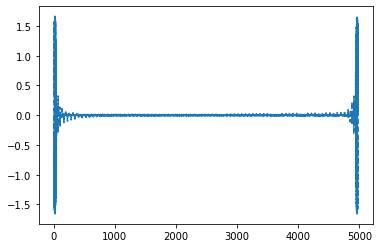

In [191]:
plt.plot(recons_ts/4-ts[:nblock*lblock],'--')

In [192]:
res=recons_ts/4-ts[:nblock*lblock]
np.std(res[1000:2000])

0.006308829298120317

In [146]:
SWs=SW_small.toarray()
SWs.shape

(163, 166)

In [149]:
np.set_printoptions(threshold=1000000)

In [150]:
SWs

array([[-3.11853747e-18,  2.12868175e-17,  9.99839709e-01,
         2.03402241e-17,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [155]:
Pinv=np.linalg.pinv(SWs)
Pinv@spec[:,0]

array([-1.54745402e-17+0.j,  2.17115005e-17+0.j, -2.96154059e-02+0.j,
       -2.93345902e-02+0.j, -2.90508489e-02+0.j, -2.87642082e-02+0.j,
       -2.84746948e-02+0.j, -2.81823358e-02+0.j, -2.78871585e-02+0.j,
       -2.75891906e-02+0.j, -2.72884603e-02+0.j, -2.69849959e-02+0.j,
       -2.66788262e-02+0.j, -2.63699803e-02+0.j, -2.60584876e-02+0.j,
       -2.57443779e-02+0.j, -2.54276812e-02+0.j, -2.51084280e-02+0.j,
       -2.47866490e-02+0.j, -2.44623751e-02+0.j, -2.41356378e-02+0.j,
       -2.38064687e-02+0.j, -2.34748997e-02+0.j, -2.31409630e-02+0.j,
       -2.28046913e-02+0.j, -2.24661173e-02+0.j, -2.21252741e-02+0.j,
       -2.17821952e-02+0.j, -2.14369143e-02+0.j, -2.10894651e-02+0.j,
       -2.07398821e-02+0.j, -2.03881997e-02+0.j, -2.00344525e-02+0.j,
       -1.96786757e-02+0.j, -1.93209044e-02+0.j, -1.89611741e-02+0.j,
       -1.85995207e-02+0.j, -1.82359800e-02+0.j, -1.78705884e-02+0.j,
       -1.75033821e-02+0.j, -1.71343980e-02+0.j, -1.67636729e-02+0.j,
       -1.63912439e-

In [158]:
x=np.zeros(10)
x[1::2]=4
x

array([0., 4., 0., 4., 0., 4., 0., 4., 0., 4.])

In [184]:
recons_ts/ts[:166*30]

/tmp/ipykernel_34189/1275998866.py:1: RuntimeWarning: divide by zero encountered in true_divide
  recons_ts/ts[:166*30]


array([           -inf, -8.52724623e-16, -1.98012949e-16, -1.06009938e-14,
       -6.50256933e-16, -1.62941987e-12, -8.49860636e-16, -2.06595986e-16,
       -1.05675320e-14, -6.45938550e-16, -8.14947326e-13, -8.46999901e-16,
       -2.15261099e-16, -1.05342403e-14, -6.41620116e-16, -5.43455580e-13,
       -8.44142410e-16, -2.24009041e-16, -1.05011176e-14, -6.37301615e-16,
       -4.07709034e-13, -8.41288153e-16, -2.32840571e-16, -1.04681625e-14,
       -6.32983028e-16, -3.26260569e-13, -8.38437122e-16, -2.41756458e-16,
       -1.04353739e-14, -6.28664339e-16,  7.58084919e-14, -2.03520753e-15,
       -1.64047871e-15,  1.21207594e-15, -2.10453839e-15,  6.46674822e-14,
       -2.03593488e-15, -1.63530703e-15,  1.20046289e-15, -2.10585612e-15,
        5.63116295e-14, -2.03666113e-15, -1.63009485e-15,  1.18891018e-15,
       -2.10717372e-15,  4.98125481e-14, -2.03738625e-15, -1.62484182e-15,
        1.17741734e-15, -2.10849119e-15,  4.46132067e-14, -2.03811028e-15,
       -1.61954757e-15,  

In [4]:
50/(2*np.pi*138e6)

5.7664834453585264e-08